In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

* This notebook contains the complete code to merge the all data sets used in this application.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Plotting the data of sentiment analysis and the stock market prices

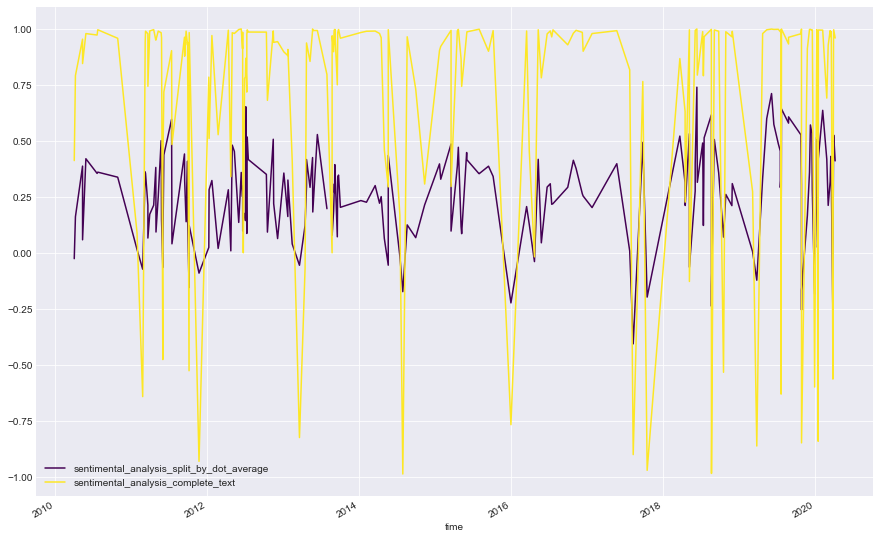

In [3]:
df_text = pd.read_pickle("data sets/microsoft_processed_text_with_time_and_sentiments.pkl")
#df_text.head()
plt.style.use('seaborn-dark')
df_text[["sentimental_analysis_split_by_dot_average","sentimental_analysis_complete_text"]].plot(cmap = "viridis",
                                                                                                 linestyle='-',figsize = (15,10))
plt.grid()
plt.show()

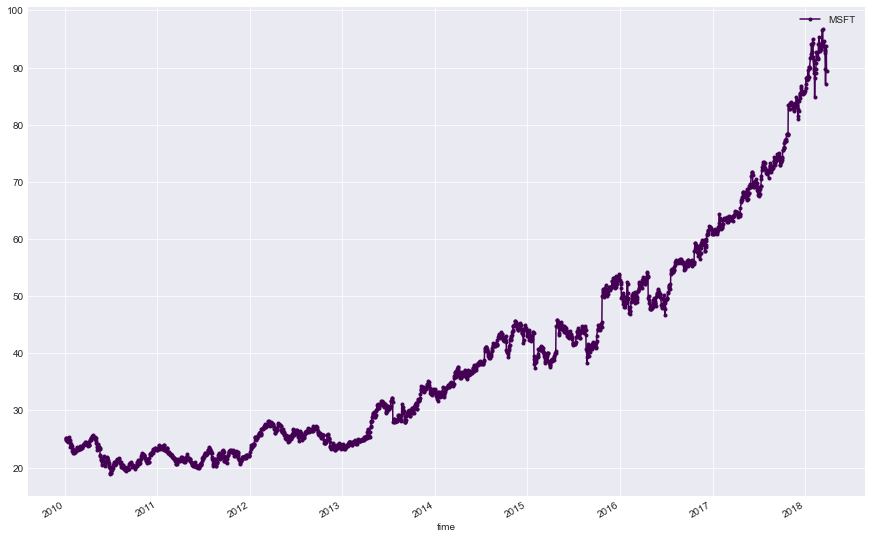

In [4]:
df_values = pd.read_pickle("data sets/df_dow_jones.pkl")
#df_values.head()


microsoft_df = df_values[["MSFT"]]
microsoft_df.plot(cmap = "viridis",linestyle='-',figsize = (15,10),marker='.')
plt.grid()
plt.show()

In [5]:
df_values

,AAPL,AXP,BA,CAT,CSCO,CVX,DD,DIS,GE,GS,...,NKE,PFE,PG,TRV,UNH,UTX,V,VZ,WMT,XOM
time,,,,,,,,,,,,,,,,,,,,,
2010-01-04,27.503268,36.309612,45.877362,46.795025,20.403200,59.405950,25.821063,28.960651,12.005225,156.422204,...,14.751122,14.063359,47.474231,41.576616,28.063718,59.603563,20.802686,21.356048,44.428303,54.558817
2010-01-05,27.550818,36.229752,47.379931,47.354487,20.312299,59.826736,25.572349,28.888407,12.067388,159.187700,...,14.809811,13.862772,47.489766,40.591665,28.019215,58.713213,20.564307,21.086531,43.985905,54.771845
2010-01-06,27.112585,36.815391,48.817171,47.498349,20.180079,59.834250,25.655254,28.734890,12.005225,157.488637,...,14.719521,13.818197,47.264512,40.015719,28.295135,58.405335,20.288165,20.788137,43.887594,55.245241
2010-01-07,27.062465,37.409903,50.793376,47.690165,20.270980,59.608829,25.919041,28.743920,12.626855,160.570447,...,14.863985,13.766193,47.008188,40.591665,29.381013,58.654966,20.476980,20.664398,43.912172,55.071662
2010-01-08,27.242385,37.383169,50.303408,48.225650,20.378409,59.714026,25.579886,28.789072,12.898818,157.533825,...,14.834641,13.877630,46.946049,40.533236,29.105093,58.771460,20.533625,20.677423,43.690972,54.850745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,171.270000,94.740000,337.100000,155.800000,44.310000,117.040000,NaN,101.820000,13.880000,261.850000,...,66.350000,36.270000,77.040000,141.100000,222.820000,127.000000,123.220000,47.280000,88.180000,75.040000
2018-03-22,168.845000,91.410000,319.610000,146.900000,43.070000,113.700000,NaN,100.600000,13.350000,252.600000,...,64.420000,35.600000,76.410000,138.150000,215.210000,124.070000,119.990000,46.880000,87.140000,73.500000
2018-03-23,164.940000,90.450000,321.000000,144.290000,42.420000,112.980000,NaN,98.540000,13.070000,245.260000,...,64.630000,34.490000,75.910000,134.900000,212.550000,122.310000,117.000000,46.290000,85.420000,72.890000


## 2. Routine to merge the data sets

In [5]:
X = df_text["sentimental_analysis_split_by_dot_average"].copy()
X = X.reset_index(drop= False)
X["time"] = pd.to_datetime(X["time"],errors = 'coerce', format = '%Y-%m-%dT%H:%M',infer_datetime_format = True, cache = True,utc=True)
X["time"] = pd.to_datetime(X["time"])

X = X.set_index(pd.DatetimeIndex(X["time"]))
X.set_index("time")
X.shape

(200, 2)

In [6]:
df_text_gensim = pd.read_pickle("data sets/microsoft_processed_text_with_time_and_gensim.pkl")
#df_text_gensim.head()
names     = df_text_gensim.columns
df_gensim = df_text_gensim[names[5:]].copy()

df_gensim = df_gensim.set_index(X.index)

X = pd.concat([X,df_gensim],axis= 1)

In [7]:
X = X.drop(["time"],axis= 1)

In [8]:
X = X.resample('1d').first()
X = X.tz_convert(None)


In [9]:
y = microsoft_df.copy()
y.shape

(2071, 1)

In [10]:
result = pd.concat([X,y], axis=1,join='inner')
result.shape


(2010, 8098)

In [11]:
result = result.fillna(method='ffill', inplace=False)



In [12]:
result.shape

(2010, 8098)

In [13]:
result.head()

,sentimental_analysis_split_by_dot_average,10,a,additional,agency,agreements,also,amsterdam,and,as,...,possess,pride,productive,productiveedge,signifies,specialized,successes,values,wyatt,MSFT
time,,,,,,,,,,,,,,,,,,,,,
2010-04-01,-0.02620,1.0,3.0,1.0,2.0,1.0,1.0,1.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.807387
2010-04-05,-0.02620,1.0,3.0,1.0,2.0,1.0,1.0,1.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.897195
2010-04-06,-0.02620,1.0,3.0,1.0,2.0,1.0,1.0,1.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.938017
2010-04-07,0.16114,1.0,8.0,0.0,0.0,0.0,4.0,0.0,18.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.962510
2010-04-08,0.16114,1.0,8.0,0.0,0.0,0.0,4.0,0.0,18.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.427881


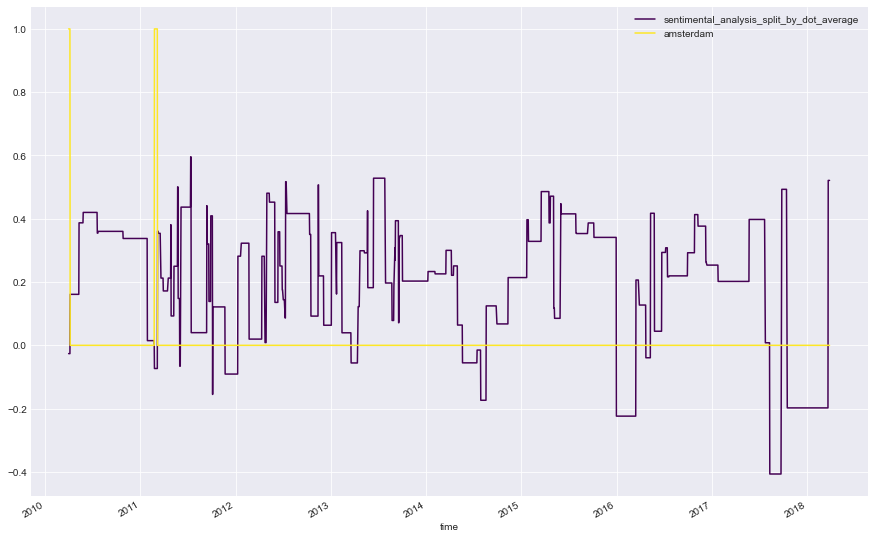

In [14]:
result[["sentimental_analysis_split_by_dot_average","amsterdam"]].plot(cmap = "viridis",linestyle='-',figsize = (15,10))
plt.grid()
plt.show()

In [15]:
result.to_pickle("data sets/data_to_paper_microsoft_case.pkl")